In [2]:
!pip install matplotlib seaborn pandas numpy


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/6f/d3/a4bbc01c237ab710a1f22b4da72f4ff6d77eb4c7735ea9811a94ae239067/matplotlib-3.10.8-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ---------------------------------------- 52.8/52.8 kB 1.3 MB/s eta 0:00:00
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/98/4b/9bd370b004b5c9d8045c6c33cf65bae018b27aca550a3f657cdc99acdbd8/contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtainin


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   claim_id         5000 non-null   int64  
 1   provider_id      5000 non-null   int64  
 2   patient_age      5000 non-null   int64  
 3   claim_amount     5000 non-null   float64
 4   claim_status     5000 non-null   object 
 5   denial_reason    495 non-null    object 
 6   service_date     5000 non-null   object 
 7   processing_days  5000 non-null   int64  
 8   state            5000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 351.7+ KB


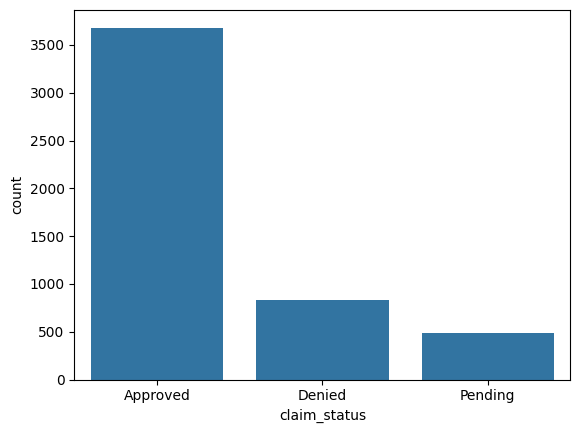

,total_claims,approval_rate,avg_processing_days
provider_id,,,
200,78,0.794872,20.730769
201,87,0.678161,20.919540
202,82,0.756098,21.573171
203,85,0.729412,21.623529
204,80,0.725000,19.575000


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/claims_data.csv")

df.head()
df.info()
df.describe()

# Claim status distribution
sns.countplot(data=df, x="claim_status")
plt.show()

# Provider performance
provider_perf = (
    df.groupby("provider_id")
    .agg(
        total_claims=("claim_id", "count"),
        approval_rate=("claim_status", lambda x: (x == "Approved").mean()),
        avg_processing_days=("processing_days", "mean")
    )
)

provider_perf.head()


In [2]:
import os
os.getcwd()


'C:\\Users\\Jyothi Bavirisetty\\Desktop\\Python Jupyter'

In [1]:
import os
os.listdir("..")


['.ipynb_checkpoints',
 'data',
 'healthcare-claims-provider-analysis',
 'healthcare_claims_eda.ipynb']

In [3]:
os.listdir("../data")


['.ipynb_checkpoints', 'claims_data.csv', 'Untitled.ipynb']

In [5]:
df.head()
df.describe()



,claim_id,provider_id,patient_age,claim_amount,processing_days
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,102500.500000,229.70120,51.373600,7564.494458,20.407200
std,1443.520003,17.26688,19.298842,4319.558892,10.918738
min,100001.000000,200.00000,18.000000,52.770000,2.000000
25%,101250.750000,215.00000,35.000000,3911.427500,11.000000
50%,102500.500000,230.00000,51.000000,7586.750000,21.000000
75%,103750.250000,245.00000,68.000000,11285.817500,30.000000
max,105000.000000,259.00000,84.000000,14996.130000,39.000000


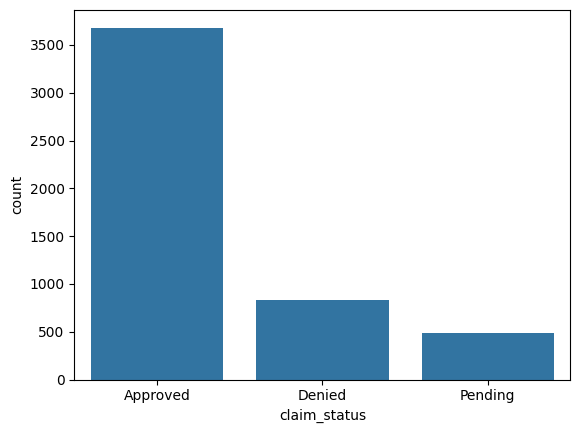

In [6]:
sns.countplot(data=df, x="claim_status")
plt.show()
